In [174]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy as np

## Age Distribution Visualization
We re-create age distribution demographic visualization using our selected countries and year based on tutorial by Oscar Leo, https://github.com/oscarleoo/age-distribution-tutorial

In [73]:
# Import all functions from age_dist_visual.py
sys.path.append(os.path.abspath(os.path.join("..", "src")))
from age_dist_visual import (
    set_seaborn_style, create_age_distribution, format_ticks,
    add_legend, create_image_from_figure, add_padding_to_chart,
    generate_country_figure, create_grid
)

We use data from the World Bank's Population Estimates and Projections database (latest version, updated December 2024). The dataset spans from 1960 to 2050, including actual historical data through 2024, and projections from 2025 onward. We visualize the data on total population and the age-group ratio for female and male.

https://datacatalog.worldbank.org/search/dataset/0037655/Population-Estimates-and-Projections

In [74]:
# Load data
population_female = pd.read_csv("../data/raw/population_absolute_female.csv", index_col=None)
population_male = pd.read_csv("../data/raw/population_absolute_male.csv", index_col=None)
population_ratio_female = pd.read_csv("../data/raw/population_ratio_female.csv", index_col=None)
population_ratio_male = pd.read_csv("../data/raw/population_ratio_male.csv", index_col=None)

# Set styles
font_family = "PT Mono"
background_color = "#253D5B"
grid_color = "#355882"
text_color = "#EEEEEE"
set_seaborn_style(font_family, background_color, grid_color, text_color)

### Creating One Plot

#### Absolute value

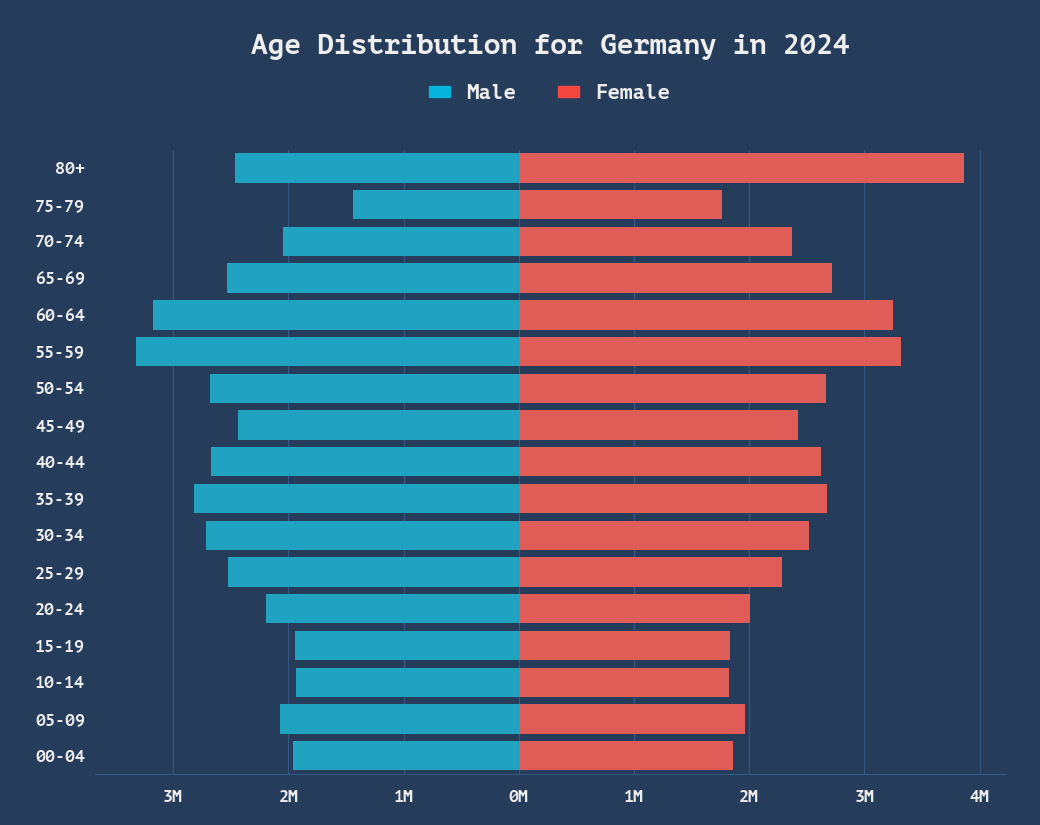

In [75]:
country_code = "DEU"
year = "2024"

country_name = population_female[population_female.country_code == country_code]["country_name"].iloc[0]
# Create plot
fig = plt.figure(figsize=(10, 8))
ax = create_age_distribution(population_female, population_male, country_code, year)
format_ticks(ax, xformat="millions")
add_legend(x=0.5, y=1.09, background_color=background_color)
plt.title(f"Age Distribution for {country_name} in {year}", y=1.14, fontsize=20)

# Convert to image and add padding
image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
image

#### Percentage Ratio

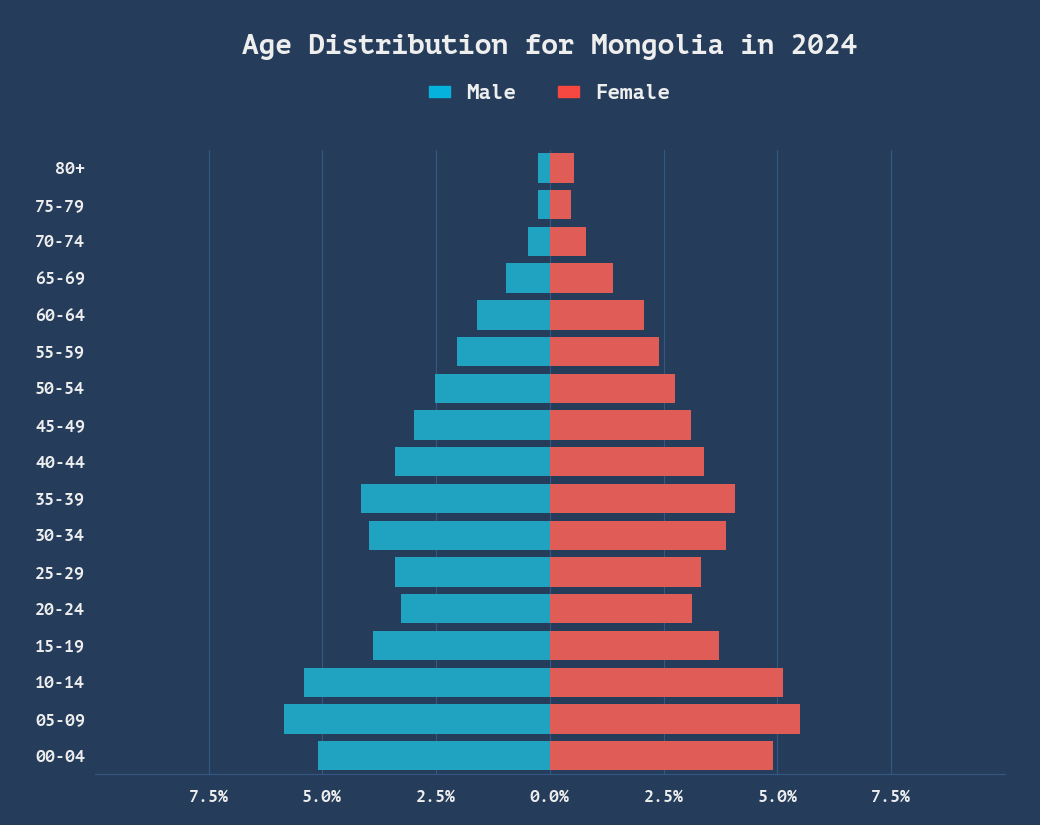

In [76]:
country_code = "MNG"
year = "2024"

country_name = population_ratio_female[population_ratio_female.country_code == country_code]["country_name"].iloc[0]
# Create plot
fig = plt.figure(figsize=(10, 8))
ax = create_age_distribution(population_ratio_female, population_ratio_male, country_code, year)
format_ticks(ax, xformat="percentage", xlim=(-10, 10))
add_legend(x=0.5, y=1.09, background_color=background_color)
plt.title(f"Age Distribution for {country_name} in {year}", y=1.14, fontsize=20)

# Convert to image and add padding
image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
image

### Creating Grid Figures

In [77]:

country_codes = [
    'AND', 'ARG', 'AUS', 'ARM', 'BGD', 'BOL', 'BRA', 'CAN', 'CHL', 'CHN', 'COL', 'CYP', 'CZE', 'ECU', 'EGY', 'ETH',
    'DEU', 'GRC', 'GBR', 'GTM', 'HKG', 'IRL', 'IDN', 'IND', 'IRN', 'IRQ', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'LBN',
    'LBY', 'MDV', 'MEX', 'MYS', 'MNG', 'MAR', 'MMR', 'NLD', 'NZL', 'NIC', 'NGA', 'PAK', 'PER', 'PHL', 'PRI', 'ROU',
    'RUS', 'SGP', 'SRB', 'SVK', 'KOR', 'TJK', 'THA', 'TUR', 'TUN', 'UKR', 'USA', 'URY', 'UZB', 'VEN', 'VNM', 'ZWE'
] 
#Our default countries from World Survey which represent world condition
year = "2024"

# Generate figures
figures = []
for code in country_codes:
    country_name = population_ratio_female[population_ratio_female.country_code == code]["country_name"].iloc[0]
    image = generate_country_figure(
        female_df=population_ratio_female,
        male_df=population_ratio_male,
        country_code=code,
        year=year,
        background_color=background_color
    )
    figures.append(image)

# Display grid
grid = create_grid(figures, pad=20, ncols=4)
grid

### Creating Time Lapse 

In [78]:
images = []
years = [year for year in population_ratio_male.columns[4:] if 2000 <= int(year) <= 2025]  # Year columns start from index 4
country_code = "JPN"  

country_name = population_ratio_female[population_ratio_female.country_code == country_code]["country_name"].iloc[0]
for year in years:
    fig = plt.figure(figsize=(10, 8))

    ax = create_age_distribution(
        female_df=population_ratio_female,
        male_df=population_ratio_male,
        country_code=country_code,
        year=year
    )

    format_ticks(ax, xformat="percentage", xlim=(-10, 10))
    add_legend(x=0.5, y=1.09, background_color=background_color)

    plt.title(f"Age Distribution for {country_name} in     ", y=1.14, fontsize=21)
    plt.text(x=0.77, y=1.15, s=str(year), fontsize=21, transform=ax.transAxes)

    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
    images.append(image)

In [79]:
# Add pause at the end
images = images + [images[-1]] * 20
# Save to gif in ./reports/figures
imageio.mimsave("../reports/figures/time-lapse.gif", images, duration=0.15)


## Health Expenditure Projection

### Preparing the data

In [171]:
df_GDPpercapita = pd.read_csv("../data/processed/GDP_percapita_clean.csv", index_col=None)
df_health = pd.read_csv("../data/processed/health_expenditure_clean.csv", index_col=None)
df_dependency_ratio = pd.read_csv("../data/processed/dependency_ratio_clean.csv", index_col=None)
df_dependency_ratio_old = pd.read_csv("../data/processed/dependency_ratio_old_clean.csv", index_col=None)
df_dependency_ratio_young = pd.read_csv("../data/processed/dependency_ratio_young_clean.csv", index_col=None)
df_population = pd.read_csv("../data/processed/pop_total_clean.csv", index_col=None)
df_income_level = pd.read_csv("../data/processed/income_level_clean.csv", index_col=None)


In [172]:
merged = df_population.merge(df_dependency_ratio_old, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_dependency_ratio_young, on=["ISO3", "Year", "Country"], how="outer") 
merged = merged.merge(df_health, on=["ISO3", "Year", "Country"], how="outer") 
merged = merged.merge(df_GDPpercapita, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_income_level, on=["ISO3", "Country"], how="left")


In [176]:
merged = merged.rename(columns={
    'Dependency_Ratio_x': 'Dependency_Ratio_Old',
    'Dependency_Ratio_y': 'Dependency_Ratio_Young'
})

# List of ISO3 codes to exclude
exclude_countries = ["HKG", "PRI", "VEN", "ZWE"]

# Filter them out
merged = merged[~merged["ISO3"].isin(exclude_countries)].reset_index(drop=True)

# Create a new column with natural log of GDP per capita
merged["log_GDP_percapita"] = np.log(merged["GDP_percapita"])

merged.to_csv('../data/interim/merged_health_projection.csv', index=False)
merged

Country ISO3  Year   Population  Dependency_Ratio_Old  \
0      Andorra  AND  2000      65685.0             17.037131   
1      Andorra  AND  2001      65852.0             17.750480   
2      Andorra  AND  2002      66506.0             18.375441   
3      Andorra  AND  2003      69486.0             18.024104   
4      Andorra  AND  2004      74325.0             16.915487   
...        ...  ...   ...          ...                   ...   
3055  Viet Nam  VNM  2046  109827659.0             27.751280   
3056  Viet Nam  VNM  2047  109930239.0             28.599491   
3057  Viet Nam  VNM  2048  109994024.0             29.590990   
3058  Viet Nam  VNM  2049  110018019.0             30.663002   
3059  Viet Nam  VNM  2050  110008908.0             31.741932   

      Dependency_Ratio_Young  Health_Expenditure  GDP_percapita  \
0                  21.223794            5.952764   21810.248743   
1                  21.239368            5.858237   23511.295148   
2                  21.180964            5.996212   26528.130158   
3                  20.856235            5.547715   34063.578403   
4                  20.411293            5.288469   39021.127810   
...                      ...                 ...            ...   
3055               26.795876                 NaN            NaN   
3056               26.847097                 NaN            NaN   
3057               26.892552                 NaN            NaN   
3058               26.914605                 NaN            NaN   
3059               26.898406                 NaN            NaN   

             income_level  log_GDP_percapita  
0             High income           9.990135  
1             High income          10.065236  
2             High income          10.185961  
3             High income          10.435984  
4             High income          10.571859  
...                   ...                ...  
3055  Lower middle income                NaN  
3056  Lower middle income                NaN  
3057  Lower middle income                NaN  
3058  Lower middle income                NaN  
3059  Lower middle income                NaN  

[3060 rows x 10 columns]

### GDP per capita projection using log-linear regression

In [177]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [181]:
# Placeholder to collect all updated rows
results = []

# Loop by country
for country, group in merged.groupby("Country"):
    group = group.sort_values("Year").copy()

    # Subset to years with valid log GDP
    train = group[(group["Year"] <= 2023) & (group["log_GDP_percapita"].notna())]

    if len(train) >= 5:  # at least 5 points to estimate trend
        X = train[["Year"]]
        y = train["log_GDP_percapita"] 

        model = LinearRegression().fit(X, y)

        # Predict future values for 2024–2050
        group_future = group[group["Year"] > 2023].copy()
        X_future = group_future[["Year"]]
        y_pred_log = model.predict(X_future)

        # Update the log_GDP_percapita column with projected values
        group_future["log_GDP_percapita"] = y_pred_log

        # recover GDP_percapita
        group_future["GDP_percapita"] = np.exp(y_pred_log)

        # Update main group
        group.update(group_future)

    results.append(group)

# Combine all countries
df_updated = pd.concat(results)

df_updated.to_csv("../data/interim/merged_health_projection_2.csv", index=False) #log GDP per capita projected up to 2050

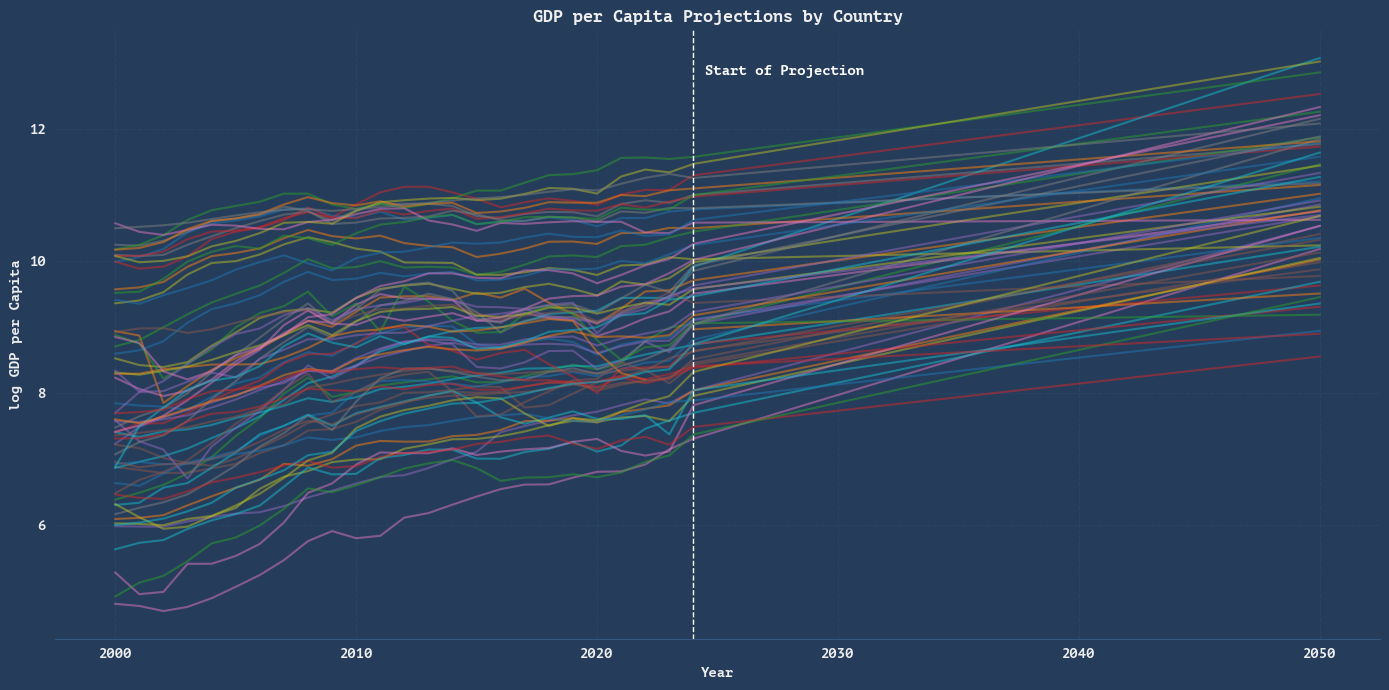

In [189]:
df = pd.read_csv("../data/interim/merged_health_projection_2.csv")

# Plot
plt.figure(figsize=(14, 7))

for iso, group in df.groupby("ISO3"):
    plt.plot(group["Year"], group["log_GDP_percapita"], alpha=0.5)  # light lines

# Add vertical line to mark the start of projection (2024)
plt.axvline(x=2024, color='white', linestyle='--', linewidth=1)
plt.text(2024.5, plt.ylim()[1]*0.95, 'Start of Projection', color='white')

plt.title("GDP per Capita Projections by Country")
plt.xlabel("Year")
plt.ylabel("log GDP per Capita")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [191]:
# Filter for the year 2050
df_2050 = df[df["Year"] == 2050].copy()

# Sort by GDP_percapita descending and get top 10
top10 = df_2050.sort_values("log_GDP_percapita", ascending=False).head(10)

# Display result
print(top10[["Country", "ISO3", "log_GDP_percapita"]])

                 Country ISO3  log_GDP_percapita
509                China  CHN          13.081551
2498           Singapore  SGP          13.028364
1223             Ireland  IRL          12.862843
203            Australia  AUS          12.535802
2345             Romania  ROU          12.338294
2039         New Zealand  NZL          12.268109
2957             Uruguay  URY          12.213425
1376          Kazakhstan  KAZ          12.159460
2906       United States  USA          12.088841
2396  Russian Federation  RUS          11.891412


### Projection Model

$$
\text{HealthExp\%GDP}_{it} = \beta_0 + \beta_1 \cdot \text{DepOld}_{it} + \beta_2 \cdot \text{DepYoung}_{it} + \beta_3 \cdot \text{LnGDPpc}_{it} + \epsilon_{it}
$$

- $\beta_0$: constant term  
- $\beta_1$: effect of aging 
- $\beta_2$: effect of youth burden 
- $\beta_3$: effect of LnGDP per capita 
- $\epsilon_{it}$: error term for country $i$ in year $t$


### Health Expenditure Projection

In [192]:
import pandas as pd

# Load the latest file that contains projected GDP_percapita
df = pd.read_csv("../data/interim/merged_health_projection_2.csv")


In [194]:
import statsmodels.formula.api as smf
df_model = df[
    (df["Year"] <= 2022) &
    df["Health_Expenditure"].notna() &
    df["Dependency_Ratio_Old"].notna() &
    df["Dependency_Ratio_Young"].notna() &
    df["log_GDP_percapita"].notna()
]

model = smf.ols(
    formula="Health_Expenditure ~ Dependency_Ratio_Old + Dependency_Ratio_Young + log_GDP_percapita",
    data=df_model
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Health_Expenditure   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     370.7
Date:                Sat, 17 May 2025   Prob (F-statistic):          2.67e-176
Time:                        09:52:03   Log-Likelihood:                -2888.8
No. Observations:                1376   AIC:                             5786.
Df Residuals:                    1372   BIC:                             5806.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3

In [195]:
# List of predictors
predictors = ["Dependency_Ratio_Old", "Dependency_Ratio_Young", "log_GDP_percapita"]

# Select data to forecast
df_future = df[
    (df["Year"] > 2022) &
    df["Health_Expenditure"].isna() &
    df["Dependency_Ratio_Old"].notna() &
    df["Dependency_Ratio_Young"].notna() &
    df["log_GDP_percapita"].notna()
].copy()

# Run prediction
df_future["Health_Expenditure"] = model.predict(df_future[predictors])

# Update original dataframe
df.update(df_future)


In [196]:
# Save the final projection dataset
df.to_csv("../data/interim/health_projection_3.csv", index=False) #Heath Expenditure projected up to 2050

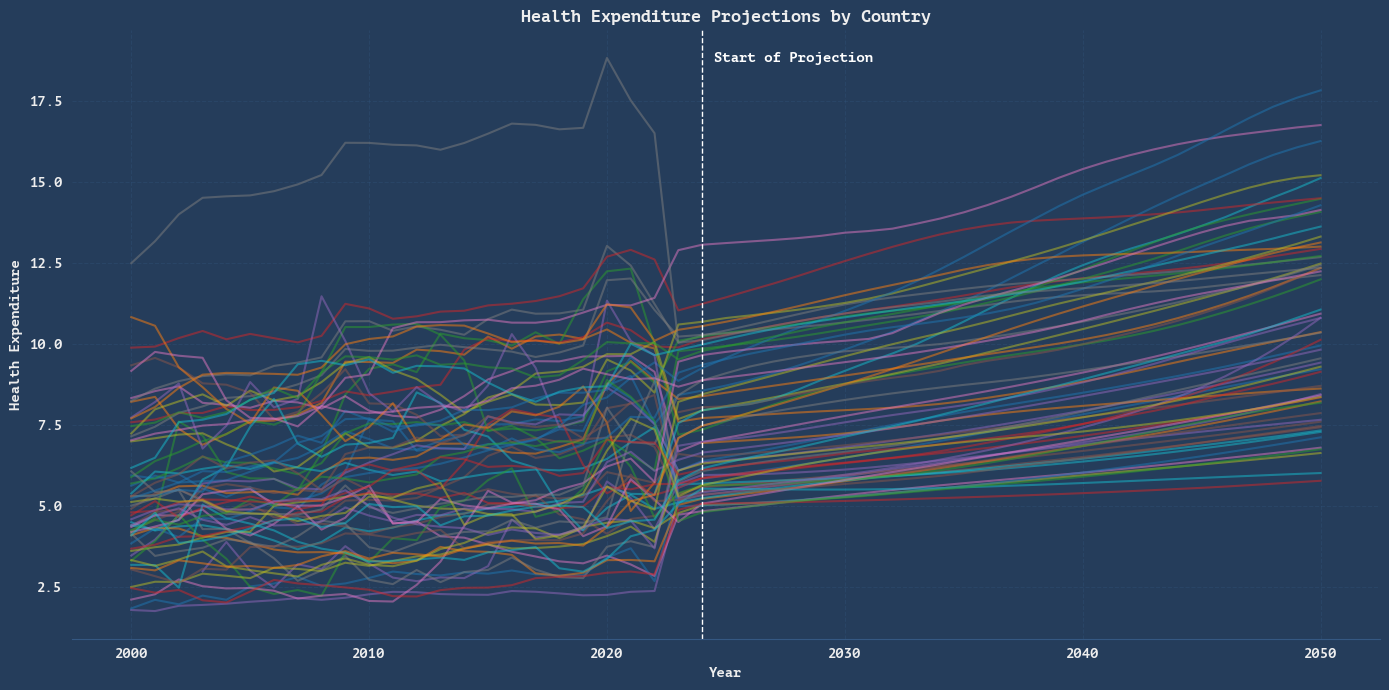

In [197]:
df = pd.read_csv("../data/interim/health_projection_3.csv")

# Plot
plt.figure(figsize=(14, 7))

for iso, group in df.groupby("ISO3"):
    plt.plot(group["Year"], group["Health_Expenditure"], alpha=0.5)  # light lines

# Add vertical line to mark the start of projection (2024)
plt.axvline(x=2024, color='white', linestyle='--', linewidth=1)
plt.text(2024.5, plt.ylim()[1]*0.95, 'Start of Projection', color='white')

plt.title("Health Expenditure Projections by Country")
plt.xlabel("Year")
plt.ylabel("Health Expenditure")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [199]:
# Filter for the year 2050
df_2050 = df[df["Year"] == 2050].copy()

# Sort by GDP_percapita descending and get top 10
top10 = df_2050.sort_values("Health_Expenditure", ascending=False).head(10)

# Display result
print(top10[["Country", "ISO3", "Health_Expenditure"]])

              Country ISO3  Health_Expenditure
1478      Korea, Rep.  KOR           17.815837
1274            Japan  JPN           16.746310
50            Andorra  AND           16.253535
917            Greece  GRC           15.202112
509             China  CHN           15.113763
866           Germany  DEU           14.491904
662           Czechia  CZE           14.473871
2549  Slovak Republic  SVK           14.275698
2345          Romania  ROU           14.129721
1223          Ireland  IRL           14.070872
